In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# READING CSV FILE

In [355]:
data=pd.read_csv(r'/Users/jangrzybek/Documents/warsaw_sep22_otodom.csv')
data.head()

,Location,Price,Price per m2,Size M2,Rooms
0,"Warszawa, Praga-Północ",396 000 zł,13 655 zł/m²,29 m²,2 pokoje
1,"Warszawa, Bemowo, ul. Secemińska",695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje
2,"Warszawa, Wilanów",828 000 zł,15 055 zł/m²,55 m²,2 pokoje
3,"Warszawa, Białołęka",730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje
4,"Warszawa, Śródmieście, ul. Marszałkowska 111a",750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje


In [356]:
data.shape

(11250, 5)

In [357]:
data.dtypes

Location        object
Price           object
Price per m2    object
Size M2         object
Rooms           object
dtype: object

# RENAMING COLUMNS NAMES

In [358]:
data=data.rename(columns={'Location':'location', 'Price':'price', 'Price per m2':'price_per_sqm', 'Size M2':'size_sqm', 'Rooms':'rooms'})
data.columns

Index(['location', 'price', 'price_per_sqm', 'size_sqm', 'rooms'], dtype='object')

# LOOKING FOR NAN VALUES 

In [359]:
data.isnull().sum()

location         0
price            0
price_per_sqm    0
size_sqm         0
rooms            0
dtype: int64

# DATA PREPROCESSING - 'location' COLUMN

In [360]:
data=data.copy()
data['district']=data['location'].str.split().str[1].str.replace(',','')
data

,location,price,price_per_sqm,size_sqm,rooms,district
0,"Warszawa, Praga-Północ",396 000 zł,13 655 zł/m²,29 m²,2 pokoje,Praga-Północ
1,"Warszawa, Bemowo, ul. Secemińska",695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje,Bemowo
2,"Warszawa, Wilanów",828 000 zł,15 055 zł/m²,55 m²,2 pokoje,Wilanów
3,"Warszawa, Białołęka",730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje,Białołęka
4,"Warszawa, Śródmieście, ul. Marszałkowska 111a",750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje,Śródmieście
...,...,...,...,...,...,...
11245,"Warszawa, Ursynów",550 000 zł,11 224 zł/m²,49 m²,2 pokoje,Ursynów
11246,"Warszawa, Ochota, Aleje Jerozolimskie",1 530 000 zł,12 000 zł/m²,127.5 m²,3 pokoje,Ochota
11247,"Warszawa, Śródmieście, Mokotowska",1 230 000 €,10 000 €/m²,123 m²,3 pokoje,Śródmieście
11248,"Warszawa, Śródmieście, Traugutta",1 295 000 zł,17 290 zł/m²,74.9 m²,3 pokoje,Śródmieście


In [361]:
data['district'].unique()

array(['Praga-Północ', 'Bemowo', 'Wilanów', 'Białołęka', 'Śródmieście',
       'Ursynów', 'Mokotów', 'Bielany', 'Wola', 'Ursus', 'Praga-Południe',
       'Targówek', 'Ochota', 'Włochy', 'Rembertów', 'Żoliborz', 'Wawer',
       'mazowieckie', 'Wesoła', 'Centrum', 'Jana', 'Warszawa', '24a',
       'Walki', 'Meriana', '56E', 'Szymczaka', 'Hirszfelda', 'Zagłoby',
       'Habicha', 'Dywizjonu', 'Langego', 'Metro', 'Droga', 'Oksza',
       'Broniewskiego', 'Prymasa'], dtype=object)

In [362]:
len(data['district'].unique())

37

In [363]:
data['district'].value_counts()

Mokotów           1730
Wola              1180
Śródmieście       1128
Praga-Południe    1080
Białołęka          784
Ursynów            741
Bielany            685
Bemowo             594
Ochota             579
Targówek           523
Wilanów            466
Żoliborz           398
Ursus              391
Praga-Północ       296
Włochy             254
Wawer              166
Wesoła              82
Rembertów           66
mazowieckie         60
Centrum             25
Warszawa             5
Szymczaka            2
Dywizjonu            1
Prymasa              1
Habicha              1
Walki                1
56E                  1
Langego              1
Hirszfelda           1
Zagłoby              1
Droga                1
24a                  1
Broniewskiego        1
Oksza                1
Meriana              1
Metro                1
Jana                 1
Name: district, dtype: int64

In [364]:
warsaw_districts=['Mokotów','Praga-Południe','Ursynów','Wola','Białołęka','Bielany','Bemowo','Targówek','Śródmieście','Ochota','Wawer','Praga-Północ','Ursus','Żoliborz','Włochy','Wilanów','Wesoła','Rembertów']

data=data.query("district in @warsaw_districts")

In [365]:
len(data['district'].unique())

18

In [366]:
data=data.drop('location', axis=1)
data

,price,price_per_sqm,size_sqm,rooms,district
0,396 000 zł,13 655 zł/m²,29 m²,2 pokoje,Praga-Północ
1,695 000 zł,11 564 zł/m²,60.1 m²,3 pokoje,Bemowo
2,828 000 zł,15 055 zł/m²,55 m²,2 pokoje,Wilanów
3,730 000 zł,13 225 zł/m²,55.2 m²,3 pokoje,Białołęka
4,750 000 zł,19 330 zł/m²,38.8 m²,2 pokoje,Śródmieście
...,...,...,...,...,...
11245,550 000 zł,11 224 zł/m²,49 m²,2 pokoje,Ursynów
11246,1 530 000 zł,12 000 zł/m²,127.5 m²,3 pokoje,Ochota
11247,1 230 000 €,10 000 €/m²,123 m²,3 pokoje,Śródmieście
11248,1 295 000 zł,17 290 zł/m²,74.9 m²,3 pokoje,Śródmieście


# DATA PREPROCESSING - 'rooms' COLUMN

In [367]:
data['rooms']=data['rooms'].str.split().str[0]
data['rooms'].value_counts()

2      4326
3      4149
4      1200
1      1031
5       322
6        75
7        30
8         5
10        3
10+       2
Name: rooms, dtype: int64

In [368]:
data=data[data['rooms'] != '10+']
data

,price,price_per_sqm,size_sqm,rooms,district
0,396 000 zł,13 655 zł/m²,29 m²,2,Praga-Północ
1,695 000 zł,11 564 zł/m²,60.1 m²,3,Bemowo
2,828 000 zł,15 055 zł/m²,55 m²,2,Wilanów
3,730 000 zł,13 225 zł/m²,55.2 m²,3,Białołęka
4,750 000 zł,19 330 zł/m²,38.8 m²,2,Śródmieście
...,...,...,...,...,...
11245,550 000 zł,11 224 zł/m²,49 m²,2,Ursynów
11246,1 530 000 zł,12 000 zł/m²,127.5 m²,3,Ochota
11247,1 230 000 €,10 000 €/m²,123 m²,3,Śródmieście
11248,1 295 000 zł,17 290 zł/m²,74.9 m²,3,Śródmieście


In [369]:
data=data.copy()
data['rooms']=data['rooms'].astype(int)

# DATA PREPROCESSING - 'size_sqm' COLUMN

In [370]:
data=data.copy()
data['size_sqm']=data['size_sqm'].str.replace('m²','').astype(float).round().astype(int)

In [371]:
data.dtypes

price            object
price_per_sqm    object
size_sqm          int64
rooms             int64
district         object
dtype: object

# DATA PREPROCESSING - 'price' and 'price_per_sqm' COLUMN

In [372]:
data['price']=data['price'].str.replace(' ','')
data

,price,price_per_sqm,size_sqm,rooms,district
0,396000zł,13 655 zł/m²,29,2,Praga-Północ
1,695000zł,11 564 zł/m²,60,3,Bemowo
2,828000zł,15 055 zł/m²,55,2,Wilanów
3,730000zł,13 225 zł/m²,55,3,Białołęka
4,750000zł,19 330 zł/m²,39,2,Śródmieście
...,...,...,...,...,...
11245,550000zł,11 224 zł/m²,49,2,Ursynów
11246,1530000zł,12 000 zł/m²,128,3,Ochota
11247,1230000€,10 000 €/m²,123,3,Śródmieście
11248,1295000zł,17 290 zł/m²,75,3,Śródmieście


In [373]:
import re

def reg_ex (price):
    return bool(re.search('€', price))    

In [374]:
data_set_price_euro=data[data["price"].apply(reg_ex)]
data_set_price_euro

,price,price_per_sqm,size_sqm,rooms,district
500,1884000€,"8589,01 €/m²",219,6,Śródmieście
743,1100000€,"11 827,96 €/m²",93,2,Śródmieście
2867,990000€,"15 639,81 €/m²",63,2,Śródmieście
2868,1100000€,"11 827,96 €/m²",93,2,Śródmieście
3460,240000€,"4807,69 €/m²",50,2,Żoliborz
5120,3000000€,"12 658,23 €/m²",237,5,Śródmieście
6356,4000000€,"17 699,12 €/m²",226,3,Mokotów
7386,590000€,"5339,37 €/m²",110,3,Mokotów
9546,1900000€,"5177,11 €/m²",367,4,Śródmieście
10765,210000€,"2896,15 €/m²",73,3,Targówek


In [375]:
data_set_price_euro.shape

(13, 5)

In [376]:
data_set_price_euro=data_set_price_euro.copy()

data_set_price_euro['price']=data_set_price_euro['price'].str.replace('€','')
data_set_price_euro['price']=data_set_price_euro['price'].astype(float) * 4.84
data_set_price_euro['price']=data_set_price_euro['price'].round().astype(int)

data_set_price_euro['price_per_sqm']=data_set_price_euro['price_per_sqm'].str.replace('€/m²','').str.replace(' ','').str.replace(',','.')
data_set_price_euro['price_per_sqm']=data_set_price_euro['price_per_sqm'].astype(float) * 4.84
data_set_price_euro['price_per_sqm']=data_set_price_euro['price_per_sqm'].round().astype(int)

data_set_price_euro

,price,price_per_sqm,size_sqm,rooms,district
500,9118560,41571,219,6,Śródmieście
743,5324000,57247,93,2,Śródmieście
2867,4791600,75697,63,2,Śródmieście
2868,5324000,57247,93,2,Śródmieście
3460,1161600,23269,50,2,Żoliborz
5120,14520000,61266,237,5,Śródmieście
6356,19360000,85664,226,3,Mokotów
7386,2855600,25843,110,3,Mokotów
9546,9196000,25057,367,4,Śródmieście
10765,1016400,14017,73,3,Targówek


In [377]:
data_set_price_pln=data[~data["price"].apply(reg_ex)]
data_set_price_pln

,price,price_per_sqm,size_sqm,rooms,district
0,396000zł,13 655 zł/m²,29,2,Praga-Północ
1,695000zł,11 564 zł/m²,60,3,Bemowo
2,828000zł,15 055 zł/m²,55,2,Wilanów
3,730000zł,13 225 zł/m²,55,3,Białołęka
4,750000zł,19 330 zł/m²,39,2,Śródmieście
...,...,...,...,...,...
11244,1207080zł,18 000 zł/m²,67,3,Mokotów
11245,550000zł,11 224 zł/m²,49,2,Ursynów
11246,1530000zł,12 000 zł/m²,128,3,Ochota
11248,1295000zł,17 290 zł/m²,75,3,Śródmieście


In [378]:
data_set_price_pln.shape

(11128, 5)

In [379]:
data_set_price_pln=data_set_price_pln.copy()

data_set_price_pln['price']=data_set_price_pln['price'].str.replace('zł','').str.replace(',','.')
data_set_price_pln=data_set_price_pln[data_set_price_pln['price'] != '$1.000.000']
data_set_price_pln['price']=data_set_price_pln['price'].astype(float)
data_set_price_pln['price']=data_set_price_pln['price'].round().astype(int)

data_set_price_pln['price_per_sqm']=data_set_price_pln['price_per_sqm'].str.replace('zł/m²','').str.replace(' ','').str.replace(',','.')
data_set_price_pln['price_per_sqm']=data_set_price_pln['price_per_sqm'].astype(float)
data_set_price_pln['price_per_sqm']=data_set_price_pln['price_per_sqm'].round().astype(int)

data_set_price_pln

,price,price_per_sqm,size_sqm,rooms,district
0,396000,13655,29,2,Praga-Północ
1,695000,11564,60,3,Bemowo
2,828000,15055,55,2,Wilanów
3,730000,13225,55,3,Białołęka
4,750000,19330,39,2,Śródmieście
...,...,...,...,...,...
11244,1207080,18000,67,3,Mokotów
11245,550000,11224,49,2,Ursynów
11246,1530000,12000,128,3,Ochota
11248,1295000,17290,75,3,Śródmieście


In [380]:
cleaned = pd.concat([data_set_price_pln,data_set_price_euro ],ignore_index=True)
cleaned

,price,price_per_sqm,size_sqm,rooms,district
0,396000,13655,29,2,Praga-Północ
1,695000,11564,60,3,Bemowo
2,828000,15055,55,2,Wilanów
3,730000,13225,55,3,Białołęka
4,750000,19330,39,2,Śródmieście
...,...,...,...,...,...
11135,9196000,25057,367,4,Śródmieście
11136,1016400,14017,73,3,Targówek
11137,968000,13260,73,2,Mokotów
11138,968000,14892,65,2,Mokotów


# DROPPING DUPLICATED ROWS

In [381]:
cleaned.drop_duplicates(keep='first', inplace=True)
cleaned.shape

(9377, 5)

# DATA CLEANING (MISTAKES DETECTION) - 'price_per_sqm' VARIABLE

In [382]:
cleaned['price_per_sqm'].describe()

count      9377.000000
mean      14508.323878
std        5488.247420
min           1.000000
25%       11332.000000
50%       13375.000000
75%       16184.000000
max      148889.000000
Name: price_per_sqm, dtype: float64

In [383]:
cleaned=cleaned.copy()
cleaned=cleaned[(cleaned['price_per_sqm'] > 8000) & (cleaned['price_per_sqm'] < 45000)]

###  It is impossible that the minimum price per square metre in the dataset is 1 PLN/m² and the maximum is 148889 PLN/m². After studying the current property listings in Warsaw, I established a reasonable price range of 8,000 PLN/m² - 45,000 PLN/m² . All values outside this range were rejected.

In [384]:
cleaned['price_per_sqm'].describe()

count     9238.000000
mean     14400.141914
std       4489.476658
min       8042.000000
25%      11395.250000
50%      13404.500000
75%      16176.000000
max      44353.000000
Name: price_per_sqm, dtype: float64

# DATA CLEANING (MISTAKES DETECTION) - 'size_sqm' VARIABLE

In [385]:
cleaned['size_sqm'].describe()

count    9238.000000
mean       62.242910
std        35.928102
min        10.000000
25%        43.000000
50%        54.000000
75%        69.000000
max       488.000000
Name: size_sqm, dtype: float64

In [386]:
cleaned[cleaned['size_sqm'] <= 15]

,price,price_per_sqm,size_sqm,rooms,district
2674,330000,22000,15,1,Śródmieście
3094,260000,17808,15,1,Praga-Południe
4269,265000,18929,14,1,Ochota
6035,145000,14500,10,1,Ursus
8510,340000,22819,15,1,Wola
10672,320000,21333,15,1,Targówek


In [387]:
cleaned=cleaned[cleaned['size_sqm'] >= 14]

### I have dropped the row with index 6035 (10 m²) and assumed that this is a business unit for sale not a flat.

In [388]:
cleaned['size_sqm'].describe()

count    9237.000000
mean       62.248566
std        35.925934
min        14.000000
25%        43.000000
50%        54.000000
75%        69.000000
max       488.000000
Name: size_sqm, dtype: float64

# DATA CLEANING (MISTAKES DETECTION) - 'rooms' VARIABLE

### After looking at some of the listings on the Otodom website, I have noticed that the rooms variable  is problematic. There are sometimes flats that are listed for sale with a different number of rooms than in reality. For example, some seller has listed: 53 square metres flat with 6 rooms, while the listing description says it has 2 rooms. I have dealt with this mistake with respect to the number of rooms and the corresponding size of the flat.

##### 1-room flats

In [389]:
cleaned[cleaned['rooms'] == 1].head()

,price,price_per_sqm,size_sqm,rooms,district
11,485000,15156,32,1,Bemowo
40,430000,11286,38,1,Białołęka
42,975000,27144,36,1,Śródmieście
43,534000,17508,30,1,Praga-Północ
45,410000,11081,37,1,Białołęka


In [390]:
cleaned[cleaned['rooms'] == 1]['size_sqm'].quantile(q=0.99)

50.299999999999955

In [391]:
cleaned[cleaned['rooms'] == 1]['size_sqm'].sort_values()

4269     14
3094     15
2674     15
8510     15
10672    15
         ..
3605     54
705      56
8710     62
10842    72
3702     88
Name: size_sqm, Length: 871, dtype: int64

In [392]:
cleaned=cleaned[~((cleaned['rooms'] ==1) & (cleaned['size_sqm'] > 50))]

### 99% of the 1-room flats listed for sale are 50 m² or less. I have assumed this value as an upper limit. Every 1-room flat in the dataset above 50 m² was considered as a mistake and consequently dropped. For example, it is almost impossible that a 1-room flat is 88 m².

In [393]:
cleaned[cleaned['rooms'] == 1]['size_sqm'].sort_values()

4269     14
10672    15
2674     15
8510     15
3094     15
         ..
220      47
6364     48
8271     50
8019     50
2957     50
Name: size_sqm, Length: 862, dtype: int64

##### 2-room flats

In [394]:
cleaned[cleaned['rooms'] == 2].head()

,price,price_per_sqm,size_sqm,rooms,district
0,396000,13655,29,2,Praga-Północ
2,828000,15055,55,2,Wilanów
4,750000,19330,39,2,Śródmieście
12,849000,16107,53,2,Praga-Północ
13,455000,11974,38,2,Ursynów


In [395]:
cleaned[cleaned['rooms'] == 2]['size_sqm'].quantile(q=0.99)

74.0

In [396]:
cleaned[cleaned['rooms'] == 2]['size_sqm'].sort_values()

50        17
10102     25
8183      25
9041      25
8093      25
        ... 
8259      93
9888      97
10545    106
151      128
3878     319
Name: size_sqm, Length: 3601, dtype: int64

In [397]:
cleaned=cleaned[~((cleaned['rooms'] ==2) & (cleaned['size_sqm'] > 74))]

### 99% of the 2-room flats listed for sale are 74 m² or less. I have assumed this value as an upper limit. Every 2-room flat in the dataset above 74 m² was considered as a mistake and consequently dropped. For example, it is almost impossible that a 2-room flat is 128 m² or 319 m².

In [398]:
cleaned[cleaned['rooms'] == 2]['size_sqm'].sort_values()

50       17
10102    25
9041     25
8093     25
8183     25
         ..
10112    73
8331     74
9946     74
5314     74
9751     74
Name: size_sqm, Length: 3568, dtype: int64

##### 3-room flats

In [399]:
cleaned[cleaned['rooms'] == 3].head()

,price,price_per_sqm,size_sqm,rooms,district
1,695000,11564,60,3,Bemowo
3,730000,13225,55,3,Białołęka
5,1500000,17964,84,3,Śródmieście
7,980000,16554,59,3,Mokotów
9,600000,12747,47,3,Mokotów


In [400]:
cleaned[cleaned['rooms'] == 3]['size_sqm'].quantile(q=0.01)

45.0

In [401]:
cleaned[cleaned['rooms'] == 3]['size_sqm'].sort_values()

3280     33
1981     35
2356     35
6084     38
3960     38
       ... 
4928    181
1008    191
1420    193
7008    201
1771    218
Name: size_sqm, Length: 3415, dtype: int64

In [402]:
cleaned=cleaned[~((cleaned['rooms'] ==3) & (cleaned['size_sqm'] <= 45))]

### 99% of the 3-room flats listed for sale are more than 45 m². I have assumed this value as an lower limit. Every 3-room flat in the dataset below or equal to 45 m² was considered as a mistake and consequently dropped. For example, it is almost imposible that a 3-room flat is 33 m².

In [403]:
cleaned[cleaned['rooms'] == 3]['size_sqm'].sort_values()

2844     46
1740     46
3378     46
1122     46
6107     46
       ... 
4928    181
1008    191
1420    193
7008    201
1771    218
Name: size_sqm, Length: 3360, dtype: int64

##### 4-room flats

In [404]:
cleaned[cleaned['rooms'] == 4].head()

,price,price_per_sqm,size_sqm,rooms,district
6,700000,10160,69,4,Ursynów
8,1899500,12099,157,4,Mokotów
16,1197700,16520,72,4,Wola
30,715000,14712,49,4,Praga-Południe
33,629000,12261,51,4,Mokotów


In [405]:
cleaned[cleaned['rooms'] == 4]['size_sqm'].quantile(q=0.01)

55.0

In [406]:
cleaned[cleaned['rooms'] == 4]['size_sqm'].sort_values()

6515      48
30        49
8370      50
33        51
4301      52
        ... 
11080    303
9699     303
11034    304
10666    357
11135    367
Name: size_sqm, Length: 1001, dtype: int64

In [407]:
cleaned=cleaned[~((cleaned['rooms'] ==4) & (cleaned['size_sqm'] <= 55))]

### 99% of the 4-room flats listed for sale are more than 55 m². I have assumed this value as an lower limit. Every 4-room flat in the dataset below or equal to 55 m² was considered as a mistake and consequently dropped. For example, it is almost imposible that a 4-room flat is 48 m².

In [408]:
cleaned[cleaned['rooms'] == 4]['size_sqm'].sort_values()

7510      56
418       56
49        56
5284      56
7018      56
        ... 
9699     303
11080    303
11034    304
10666    357
11135    367
Name: size_sqm, Length: 985, dtype: int64

##### 5-room flats

In [409]:
cleaned[cleaned['rooms'] == 5].head()

,price,price_per_sqm,size_sqm,rooms,district
74,1350000,10243,132,5,Ursynów
160,1497000,14970,100,5,Wola
245,1710000,12316,139,5,Ochota
267,2399000,17601,136,5,Mokotów
311,799000,13317,60,5,Wola


In [410]:
cleaned[cleaned['rooms'] == 5]['size_sqm'].quantile(q=0.1)

85.1

In [411]:
cleaned[cleaned['rooms'] == 5]['size_sqm'].sort_values()

2081      57
11007     59
2281      60
5813      60
311       60
        ... 
11061    328
1588     343
7836     352
10599    353
11039    390
Name: size_sqm, Length: 262, dtype: int64

In [412]:
cleaned=cleaned[~((cleaned['rooms'] ==5) & (cleaned['size_sqm'] <= 85))]

### 99% of the 5-room flats listed for sale are more than 85 m². I have assumed this value as an lower limit. Every 5-room flat in the dataset below or equal to 85 m² was considered as a mistake and consequently dropped. For example, it is almost imposible that a 5-room flat is 57 m².

In [413]:
cleaned[cleaned['rooms'] == 5]['size_sqm'].sort_values()

9341      86
9287      86
1412      87
4948      90
10161     92
        ... 
11061    328
1588     343
7836     352
10599    353
11039    390
Name: size_sqm, Length: 235, dtype: int64

##### 6-room flats

In [414]:
cleaned[cleaned['rooms'] == 6].head()

,price,price_per_sqm,size_sqm,rooms,district
10,810000,10800,75,6,Bielany
496,8850000,40346,219,6,Śródmieście
622,3099000,18669,166,6,Wilanów
972,2600000,10400,250,6,Ursynów
1364,5200000,13083,397,6,Mokotów


In [415]:
cleaned[cleaned['rooms'] == 6]['size_sqm'].quantile(q=0.1)

124.2

In [416]:
cleaned[cleaned['rooms'] == 6]['size_sqm'].sort_values()

10324     53
10        75
2497      96
3981     115
10462    119
10177    123
10367    125
8653     128
4007     130
6699     145
4859     160
622      166
8204     166
4287     166
4666     172
6064     172
1393     172
3826     173
2216     173
10916    180
10742    181
2015     182
9894     183
10810    183
9829     192
1418     198
2763     203
5392     204
8575     205
7961     219
11127    219
496      219
7956     220
5382     222
8971     225
6046     227
5711     227
6872     227
6459     227
1521     231
1437     238
3962     240
7315     250
972      250
4631     250
6525     273
8231     274
5238     274
8586     281
9396     281
1376     283
10446    309
3289     328
1779     340
9718     350
1364     397
9560     488
Name: size_sqm, dtype: int64

In [417]:
cleaned=cleaned[~((cleaned['rooms'] ==6) & (cleaned['size_sqm'] <= 124))]

### 99% of the 6-room flats listed for sale are more than 124 m². I have assumed this value as an lower limit. Every 6-room flat in the dataset below or equal to 124 m² was considered as a mistake and consequently dropped. For example, it is almost imposible that a 6-room flat is 53 m².

In [418]:
cleaned[cleaned['rooms'] == 6]['size_sqm'].sort_values()

10367    125
8653     128
4007     130
6699     145
4859     160
622      166
4287     166
8204     166
6064     172
4666     172
1393     172
2216     173
3826     173
10916    180
10742    181
2015     182
9894     183
10810    183
9829     192
1418     198
2763     203
5392     204
8575     205
7961     219
496      219
11127    219
7956     220
5382     222
8971     225
5711     227
6046     227
6459     227
6872     227
1521     231
1437     238
3962     240
7315     250
4631     250
972      250
6525     273
5238     274
8231     274
9396     281
8586     281
1376     283
10446    309
3289     328
1779     340
9718     350
1364     397
9560     488
Name: size_sqm, dtype: int64

##### 7-room flats

In [419]:
cleaned[cleaned['rooms'] == 7]

,price,price_per_sqm,size_sqm,rooms,district
189,2700000,10030,269,7,Wola
1378,4600000,18511,248,7,Śródmieście
1425,5900000,26818,220,7,Śródmieście
2085,3490000,16942,206,7,Żoliborz
3550,8540910,31500,271,7,Wola
3823,3200000,15542,206,7,Ochota
4113,2730000,17414,157,7,Śródmieście
4207,5950420,19000,313,7,Śródmieście
4507,5950000,16856,353,7,Żoliborz
5326,3564000,20891,171,7,Wola


In [420]:
cleaned[cleaned['rooms'] == 7]['size_sqm'].quantile(q=0.1)

150.4

In [421]:
cleaned[cleaned['rooms'] == 7]['size_sqm'].sort_values()

9633      75
11112    121
10548    146
4113     157
7693     158
8042     160
8505     170
5326     171
9603     173
5630     198
10937    200
2085     206
3823     206
6284     218
1425     220
1378     248
189      269
3550     271
11107    281
10770    294
10037    295
5917     300
4207     313
4507     353
7573     400
Name: size_sqm, dtype: int64

In [422]:
cleaned=cleaned[~((cleaned['rooms'] ==7) & (cleaned['size_sqm'] <= 150))]

### 99% of the 7-room flats listed for sale are more than 150 m². I have assumed this value as an lower limit. Every 7-room flat in the dataset below or equal to 150 m² was considered as a mistake and consequently dropped. For example, it is almost imposible that a 7-room flat is 75 m².

In [423]:
cleaned[cleaned['rooms'] == 7]['size_sqm'].sort_values()

4113     157
7693     158
8042     160
8505     170
5326     171
9603     173
5630     198
10937    200
2085     206
3823     206
6284     218
1425     220
1378     248
189      269
3550     271
11107    281
10770    294
10037    295
5917     300
4207     313
4507     353
7573     400
Name: size_sqm, dtype: int64

##### 8-room flats

In [424]:
cleaned[cleaned['rooms'] == 8]['size_sqm'].sort_values()

2685     126
10915    215
10710    323
1057     487
Name: size_sqm, dtype: int64

In [425]:
cleaned=cleaned[~((cleaned['rooms'] ==8) & (cleaned['size_sqm'] == 126))]

### In my opinion, the 8-room flat with an area of 126 square metres (index 2685) is a mistake. It does not look trustworthy compared to the other 8-room flats. I have dropped it from the data set.

In [426]:
cleaned[cleaned['rooms'] == 8]['size_sqm'].sort_values()

10915    215
10710    323
1057     487
Name: size_sqm, dtype: int64

##### 9 Rooms

In [427]:
cleaned[cleaned['rooms'] == 9]['size_sqm'].sort_values()

Series([], Name: size_sqm, dtype: int64)

##### 10 Rooms

In [428]:
cleaned[cleaned['rooms'] == 10]['size_sqm'].sort_values()

10206    488
Name: size_sqm, dtype: int64

# DATA CLEANING (MISTAKES DETECTION) - 'price' VARIABLE

In [429]:
cleaned['price'].describe().apply("{0:.5f}".format)

count        9087.00000
mean       934921.35688
std        927852.95048
min        204000.00000
25%        549999.50000
50%        695000.00000
75%        960000.00000
max      21600000.00000
Name: price, dtype: object

In [430]:
cleaned[cleaned['price'] == 204000]

,price,price_per_sqm,size_sqm,rooms,district
5610,204000,12000,17,1,Ursus


In [431]:
cleaned[cleaned['price'] == 21600000]

,price,price_per_sqm,size_sqm,rooms,district
1057,21600000,44353,487,8,Mokotów


In [432]:
cleaned.shape

(9087, 5)

### The dataset has 9087 rows after dropping mistakes.

# STATISTICS - 'price_per_sqm' VARIABLE

In [433]:
cleaned['price_per_sqm'].describe()

count     9087.000000
mean     14394.915484
std       4474.876347
min       8042.000000
25%      11400.000000
50%      13407.000000
75%      16171.000000
max      44353.000000
Name: price_per_sqm, dtype: float64

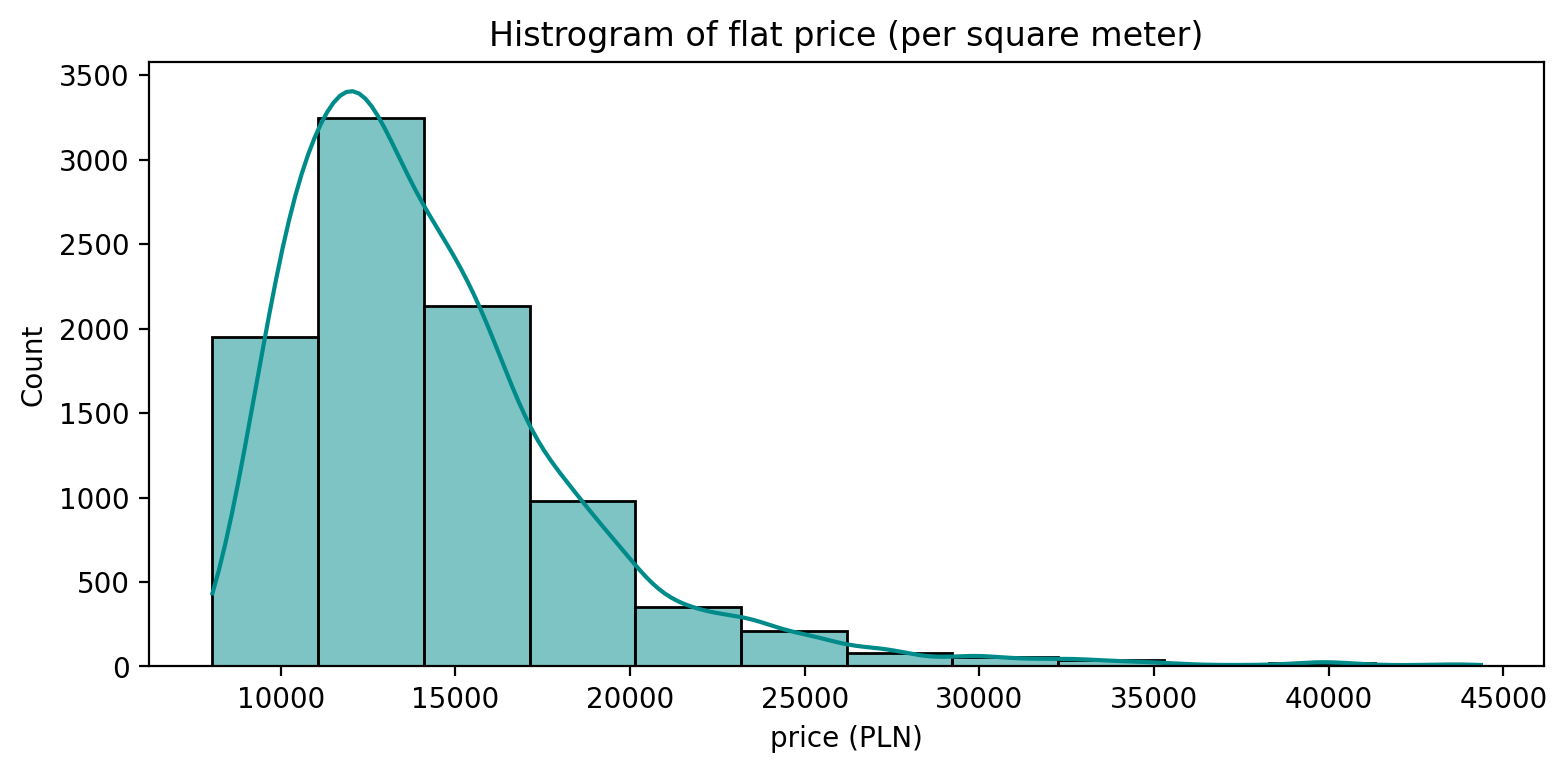

In [434]:
plt.figure(figsize=( 9,4), dpi=200)
sns.histplot(data=cleaned, x="price_per_sqm", kde=True, bins=12, color='darkcyan')
plt.title('Histrogram of flat price (per square meter)')
plt.xlabel('price (PLN)')
plt.show()

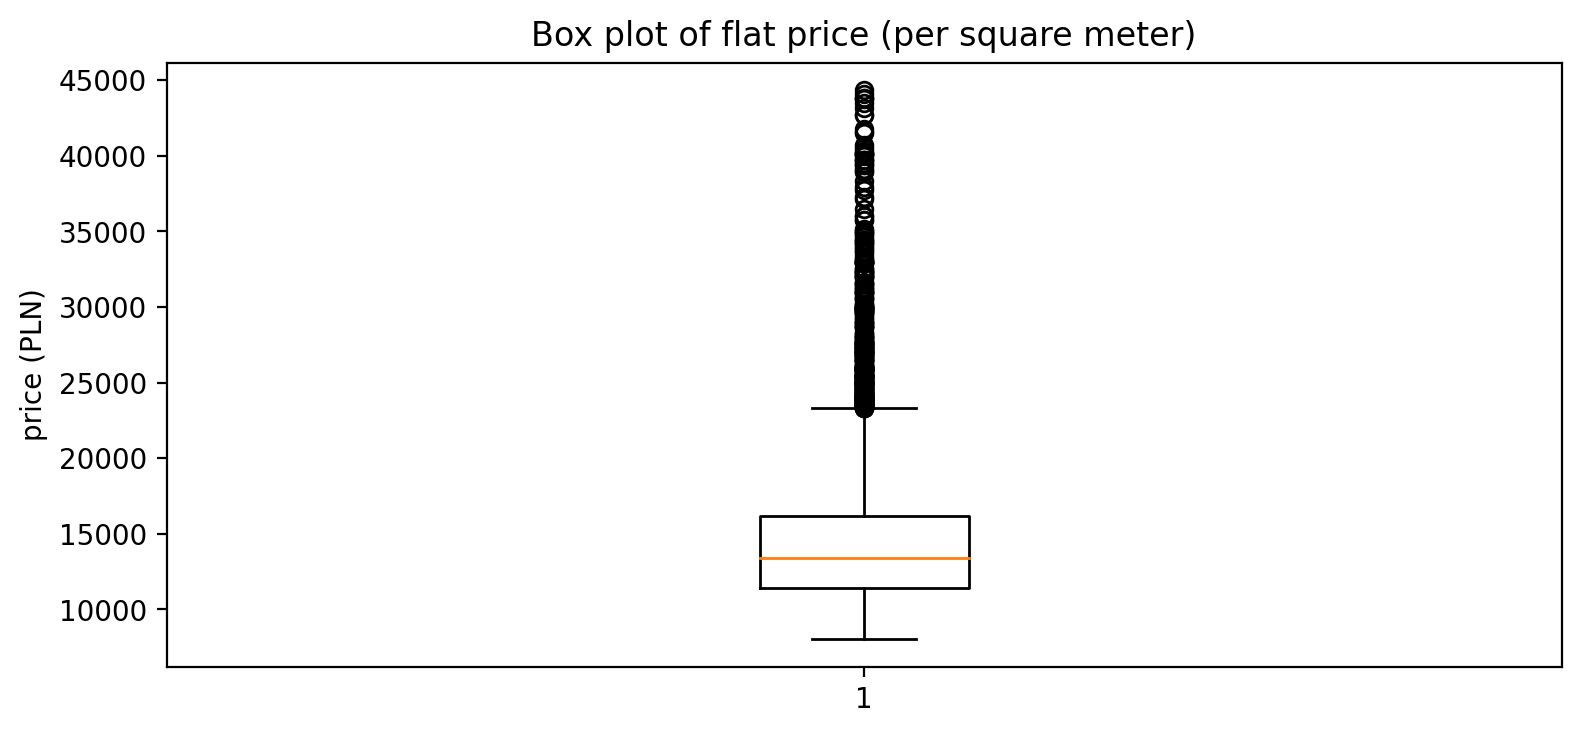

In [435]:
plt.figure(figsize=( 9,4), dpi=200)
plt.boxplot(cleaned['price_per_sqm'])
plt.title('Box plot of flat price (per square meter)')
plt.ylabel('price (PLN)')
plt.show()

In [436]:
IQR_price_per_sqm= cleaned.price_per_sqm.quantile(q=0.75) - cleaned.price_per_sqm.quantile(q=0.25)
IQR_price_per_sqm

4771.0

### The distribution of property price per square metre is right-skewed, meaning that lower values occur more often than high values. The box plot above shows that the variable has many natural outliers. The minimum price value is 8042 PLN / m² and the maximum is 44353 PLN / m². The mean price in Warsaw is 14395 PLN / m² however, the median is 13407 PLN / m². Extreme values, such as prestigious properties with expensive prices, contribute to the increase of the mean. In this case, the median is a more trustworthy measure. The price IQR is 4771.

# STATISTICS - 'size_sqm' VARIABLE

In [437]:
cleaned['size_sqm'].describe()

count    9087.000000
mean       62.209530
std        36.011039
min        14.000000
25%        43.000000
50%        54.000000
75%        69.000000
max       488.000000
Name: size_sqm, dtype: float64

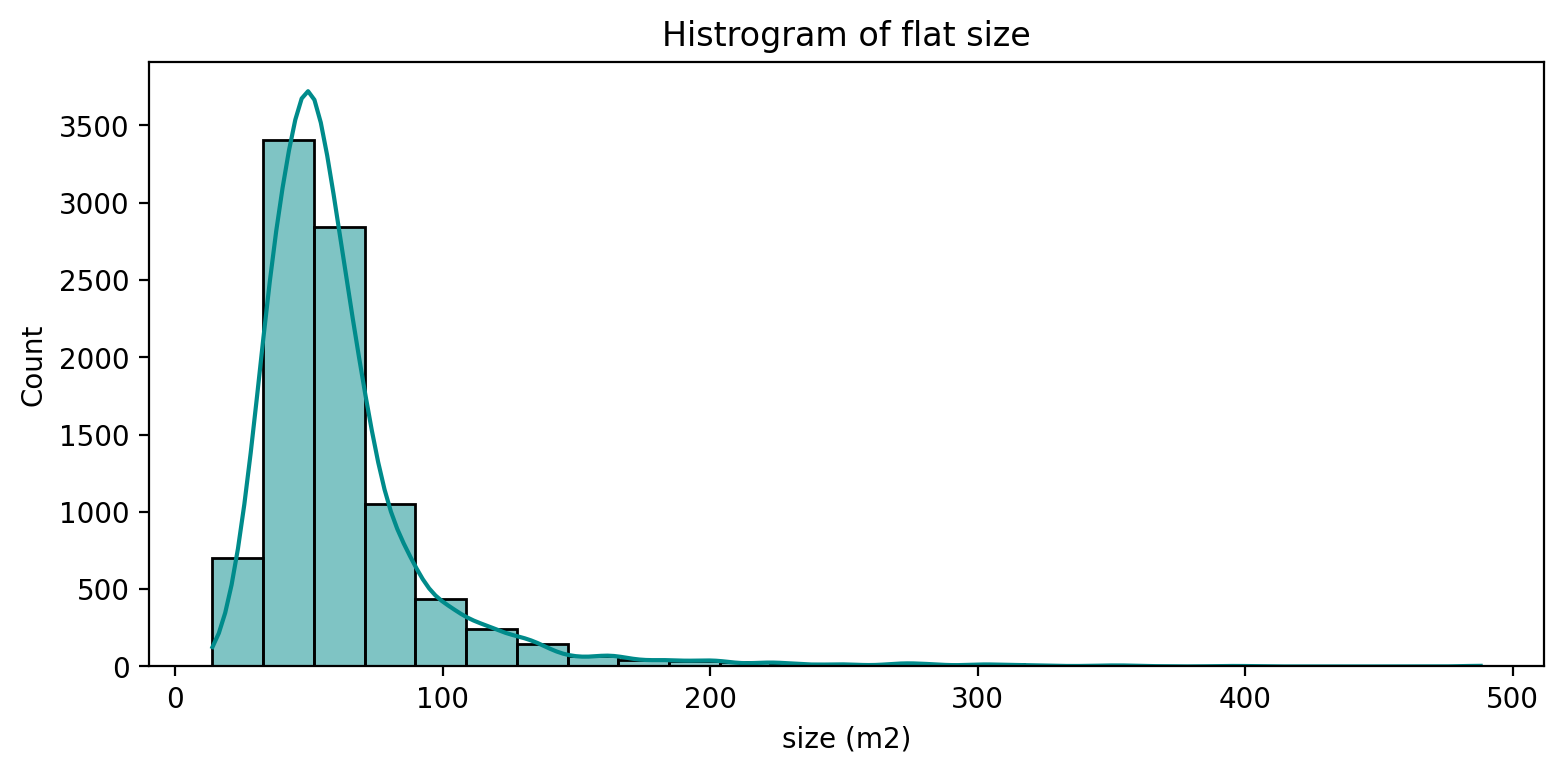

In [438]:
plt.figure(figsize=( 9,4), dpi=200)
sns.histplot(data=cleaned, x="size_sqm", kde=True, bins=25, color='darkcyan')
plt.title('Histrogram of flat size')
plt.xlabel('size (m2)')
plt.show()

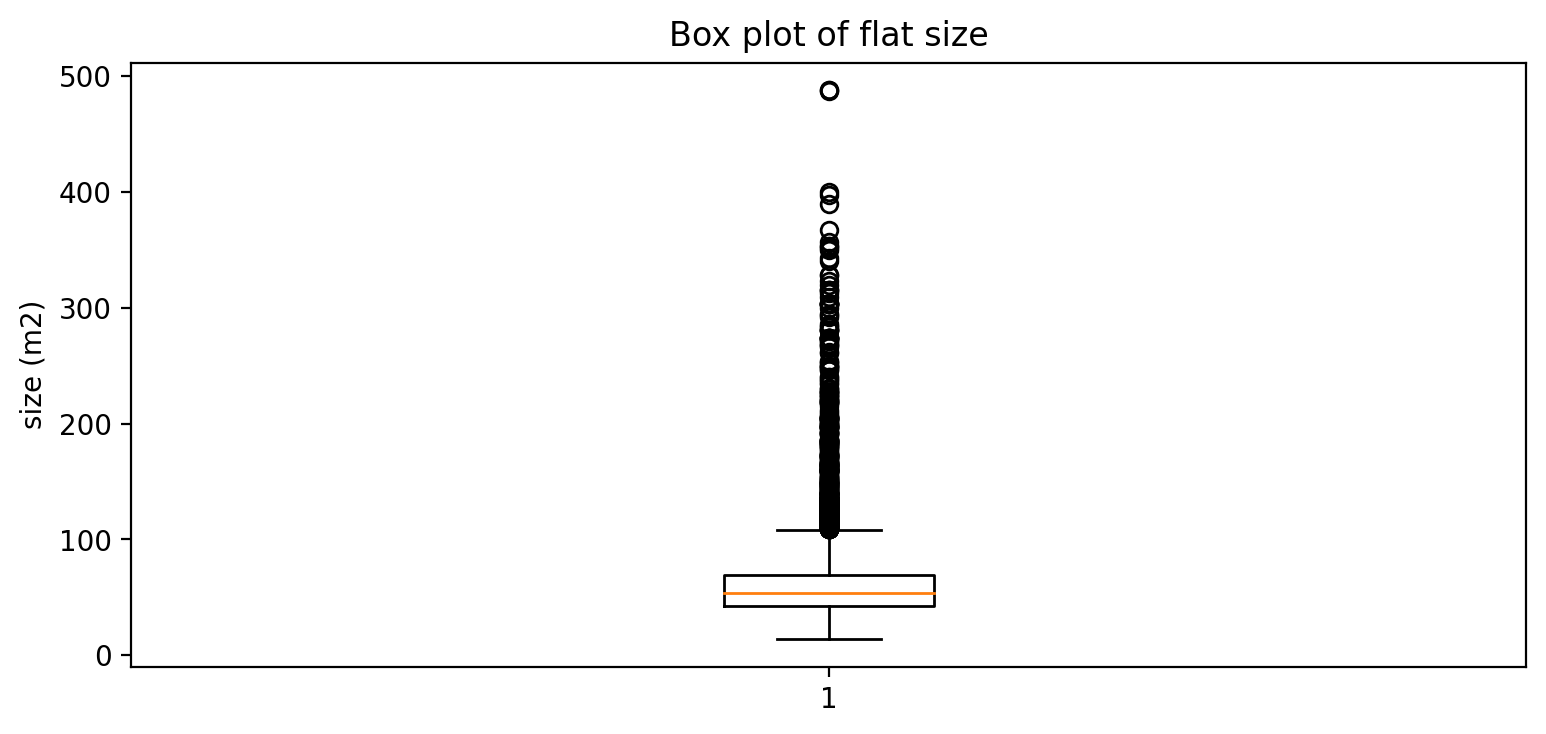

In [439]:
plt.figure(figsize=( 9,4), dpi=200)
plt.boxplot(cleaned['size_sqm'])
plt.title('Box plot of flat size')
plt.ylabel('size (m2)')
plt.show()

In [440]:
IQR_size_sqm= cleaned.size_sqm.quantile(q=0.75) - cleaned.size_sqm.quantile(q=0.25)
IQR_size_sqm

26.0

### The distribution of property size is right-skewed, meaning that lower values occur more often than high values. The box plot above shows that the variable has many natural outliers. The minimum flat size is 14 m² and the maximum is 488 m². The average flat size in Warsaw is 62 m² while the median is 54 m². Outliers, such as large flats, contribute to the increase of the mean. In this case, the median is a more trustworthy measure. The property size IQR is 26.

# STATISTICS - 'rooms' VARIABLE

In [441]:
cleaned['rooms'].describe()

count    9087.000000
mean        2.606691
std         0.965525
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        10.000000
Name: rooms, dtype: float64

In [442]:
rooms_counted=cleaned['rooms'].value_counts()
rooms_counted.head()

2    3568
3    3360
4     985
1     862
5     235
Name: rooms, dtype: int64

In [443]:
rooms_percent=rooms_counted / cleaned.shape[0] *100
rooms_percent.head()

2    39.264884
3    36.975900
4    10.839661
1     9.486079
5     2.586112
Name: rooms, dtype: float64

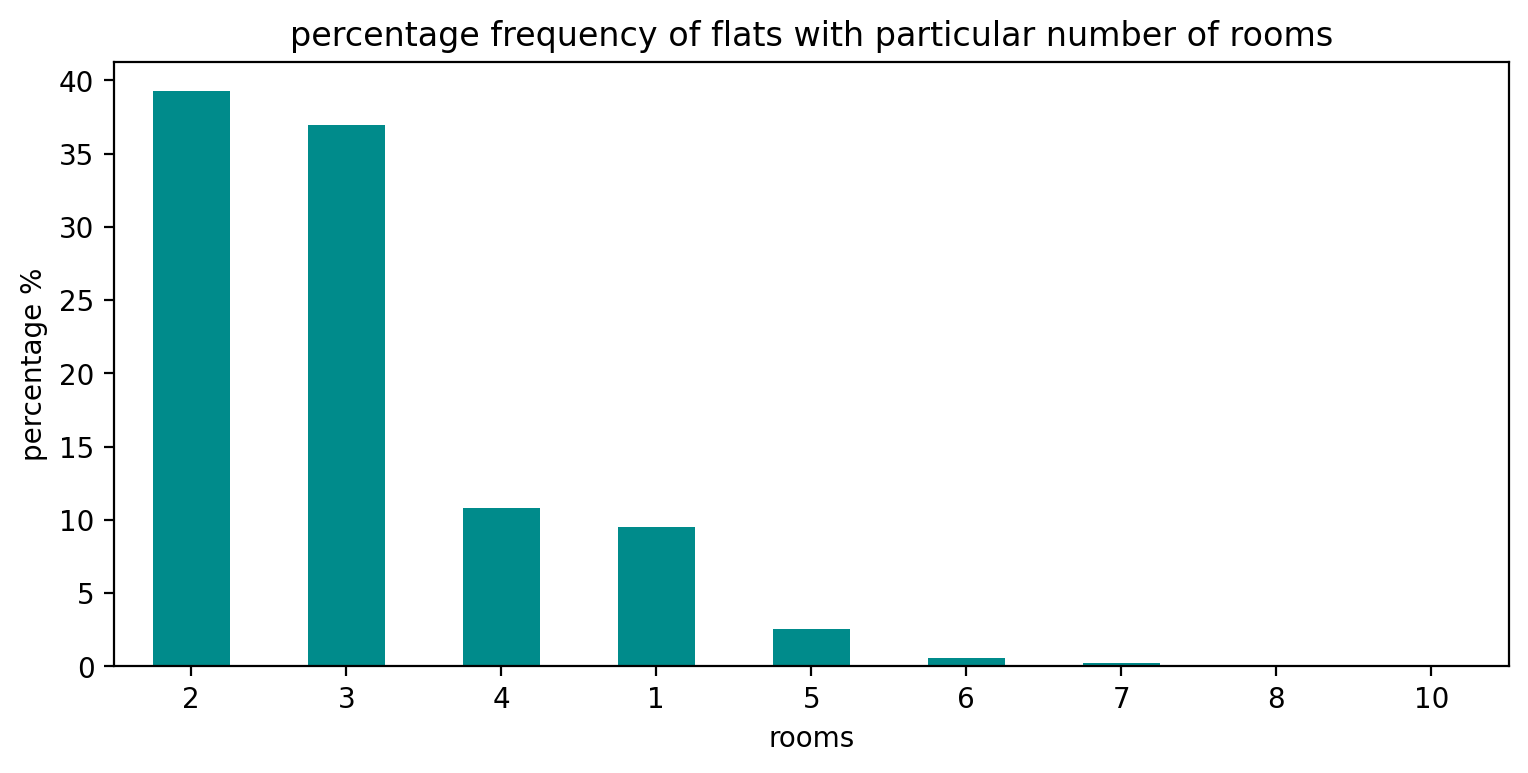

In [444]:
plt.figure(figsize=( 9,4), dpi=200)
rooms_percent.plot(kind='bar', color='darkcyan')
plt.xticks(rotation =0)
plt.title('percentage frequency of flats with particular number of rooms')
plt.xlabel('rooms')
plt.ylabel('percentage %')
plt.show()

### Rooms frequency table:
- 2 room (3568 offers, 39% overall)
- 3 room (3360 offers, 37% overall)
- 4 room (985 offers, 11% overall)
- 1 room (862 offers, 9% overall)
- 5 room (235 offers, 3% overall)
- 6 room (51 offers, 0.6% overall)
- 7 room (22 offers, 0.2% overall)
- 8 room (3 offers, 0.03% overall)
- 9 room (0 offers, 0% overall)
- 10 room (1 offer, 0.01% overall)

# STATISTICS - 'district' VARIABLE

In [445]:
district_counted=cleaned['district'].value_counts().sort_values()
district_counted.head()

Rembertów        49
Wesoła           65
Wawer           109
Włochy          228
Praga-Północ    254
Name: district, dtype: int64

In [446]:
district_percentage= district_counted / cleaned.shape[0]* 100
district_percentage.head()

Rembertów       0.539232
Wesoła          0.715308
Wawer           1.199516
Włochy          2.509079
Praga-Północ    2.795202
Name: district, dtype: float64

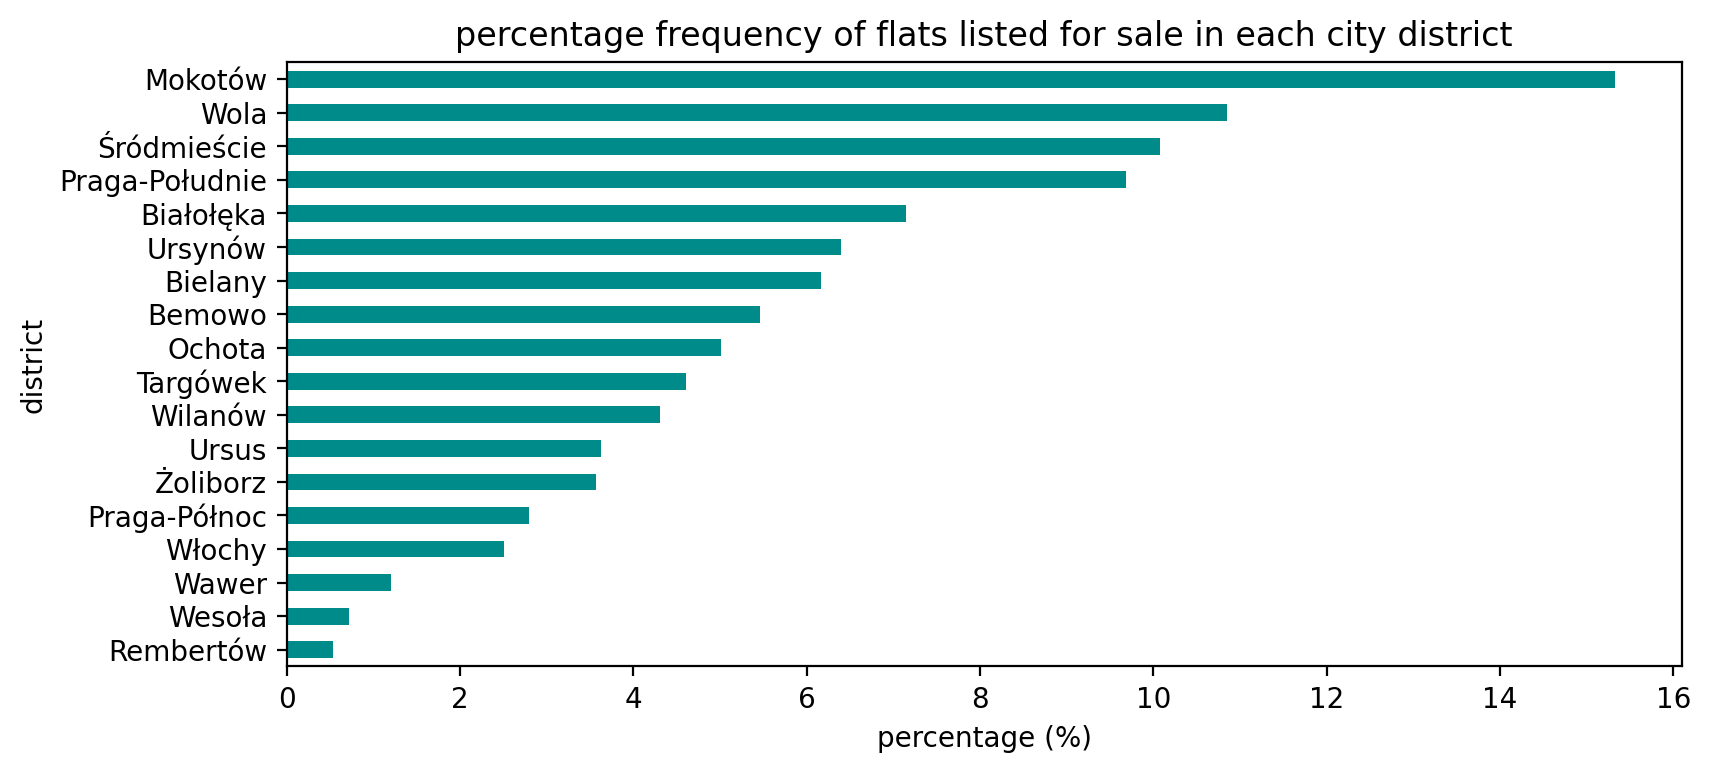

In [447]:
plt.figure(figsize=( 9,4), dpi=200)
district_percentage.plot(kind='barh', color='darkcyan')
plt.ylabel('district')
plt.xlabel('percentage (%)')
plt.title('percentage frequency of flats listed for sale in each city district')
plt.show()

### District frequency table:
-   1. Mokotów (1393 offers, 15% overall)
-   2. Wola (986 offers, 11% overall)
-   3. Śródmieście (916 offers, 10% overall)
-   4. Praga-Południe (880 offers, 9.7% overall)
-   5. Białołęka (649 offers, 7% overall)
-   6. Ursynów (581 offers, 6.4% overall)
-   7. Bielany (560 offers, 6.1% overall)
-   8. Bemowo (496 offers, 5.5% overall)
-   9. Ochota (456 offers, 5% overall)
-   10. Targówek (419 offers, 4.6% overall)
-   11. Wialnów (392 offers, 4.3% overall)
-   12. Ursus (330 offers, 3.6% overall)
-   13. Żoliborz (324 offers, 3.6% overall)
-   14. Praga-Północ (254 offers, 2.8% overall)
-   15. Włochy (228 offers, 2.5% overall)
-   16. Wawer (109 offers, 1.1% overall)
-   17. Wesoła (65 offers, 0.7% overall)
-   18. Rembertów (49 offers, 0.5% overall)

# GROUPED STATISTICS FOR EACH DISTRICT - 'price_per_sqm' 

In [448]:
grouped_median_price_per_sqm=cleaned.groupby('district')['price_per_sqm'].median().sort_values()
grouped_median_price_per_sqm.head()

district
Wesoła        9992.0
Rembertów    10184.0
Białołęka    10348.0
Wawer        10365.0
Ursus        11089.5
Name: price_per_sqm, dtype: float64

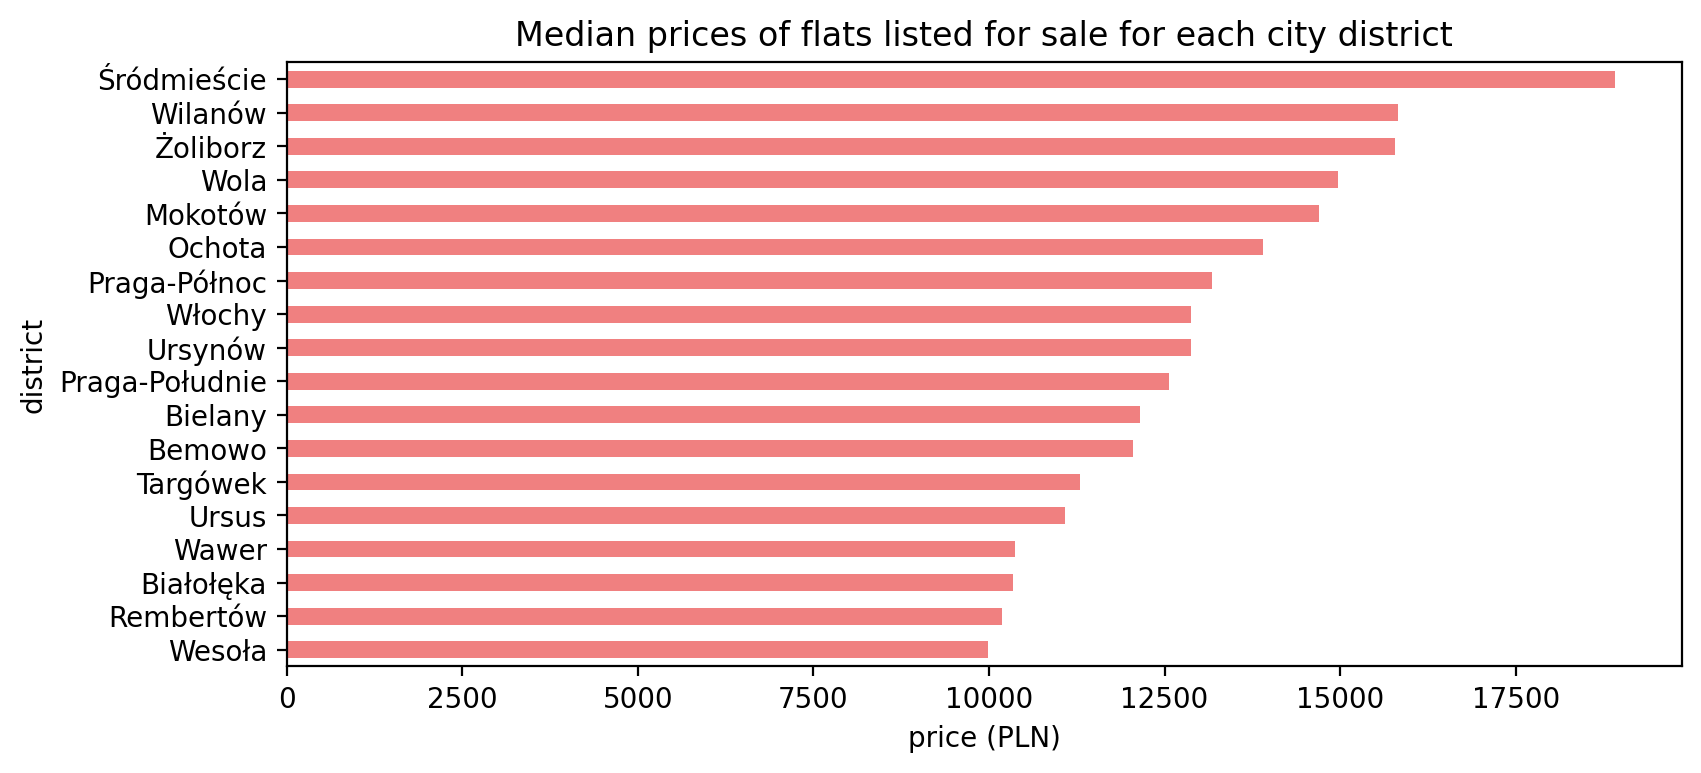

In [449]:
plt.figure(figsize=( 9,4), dpi=200)
grouped_median_price_per_sqm.plot(kind='barh',color='lightcoral')
plt.ylabel('district')
plt.xlabel('price (PLN)')
plt.title('Median prices of flats listed for sale for each city district')
plt.show()

### Median prices of flats listed for sale for each district:
-   1. Śródmieście 18 915 PLN / m²
-   2. Wilanów 15 818 PLN / m²
-   3. Żoliborz 15 777 PLN / m²
-   4. Wola 14974 PLN / m²
-   5. Mokotów 14699 PLN / m²
-   6. Ochota 13896.5 PLN / m²
-   7. Praga-Północ 13173.5 PLN / m²
-   8. Włochy 12871  PLN / m²
-   9. Ursynów 12871 PLN / m²
-   10. Praga-Południe 12567.5 PLN / m²
-   11. Bielny 12154 PLN / m²
-   12. Bemowo 12049  PLN / m²
-   13. Targówek 11302 PLN / m²
-   14. Ursus 11089.5 PLN / m²
-   15. Wawer 10365 PLN / m²
-   16. Białołęka 10 348 PLN / m²
-   17. Rembertów 10 184 PLN / m²
-   18. Wesoła 9 992 PLN / m²

# GROUPED STATISTICS FOR EACH DISTRICT - 'size_sqm' 

In [450]:
grouped_median_size_sqm=cleaned.groupby('district')['size_sqm'].median().sort_values()
grouped_median_size_sqm.head()

district
Praga-Północ    44.5
Wola            49.0
Żoliborz        50.0
Bielany         50.0
Ochota          51.0
Name: size_sqm, dtype: float64

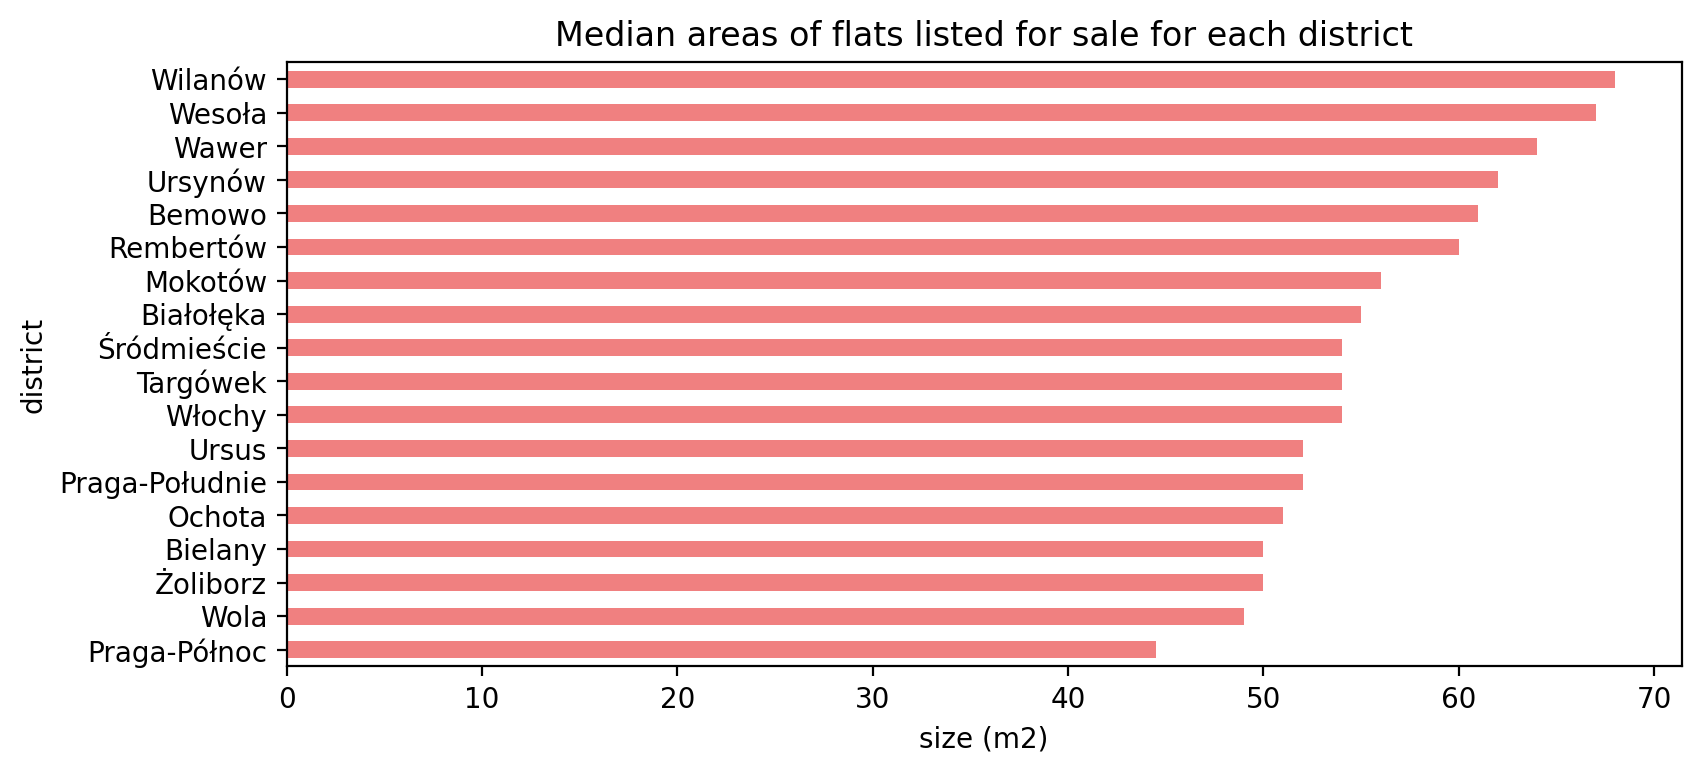

In [451]:
plt.figure(figsize=( 9,4), dpi=200)
grouped_median_size_sqm.plot(kind='barh',color='lightcoral')
plt.ylabel('district')
plt.xlabel('size (m2)')
plt.title('Median areas of flats listed for sale for each district')
plt.show()

### Median areas of flats listed for sale for each district:
-   1. Wilanów 68 m²
-   2. Wesoła 67 m²
-   3. Wawer 64 m²
-   4. Ursynów 62 m²
-   5. Bemowo 61 m²
-   6. Rembertów 60 m²
-   7. Mokotów 56 m²
-   8. Białołęka 55 m²
-   9. Śródmieście 54 m²
-   10. Targówek 54 m²
-   11. Włochy 54 m²
-   12. Ursus 52 m²
-   13. Praga-Południe 52 m²
-   14. Ochota 51 m²
-   15. Bielany 50 m²
-   16. Żoliborz 50 m²
-   17. Wola 49 m²
-   18. Praga-Północ 44.5 m²

# BUILDING LINEAR REGRESSION MODEL

In [452]:
cleaned_updated=cleaned[['price','size_sqm','rooms','district']]
cleaned_updated

,price,size_sqm,rooms,district
0,396000,29,2,Praga-Północ
1,695000,60,3,Bemowo
2,828000,55,2,Wilanów
3,730000,55,3,Białołęka
4,750000,39,2,Śródmieście
...,...,...,...,...
11134,2855600,110,3,Mokotów
11135,9196000,367,4,Śródmieście
11136,1016400,73,3,Targówek
11137,968000,73,2,Mokotów


### dependant variable:
 - price
### predictors: 

- size_sqm
- rooms
- district

In [453]:
correlations=cleaned_updated.corr()
correlations

,price,size_sqm,rooms
price,1.000000,0.846518,0.550897
size_sqm,0.846518,1.000000,0.773971
rooms,0.550897,0.773971,1.000000


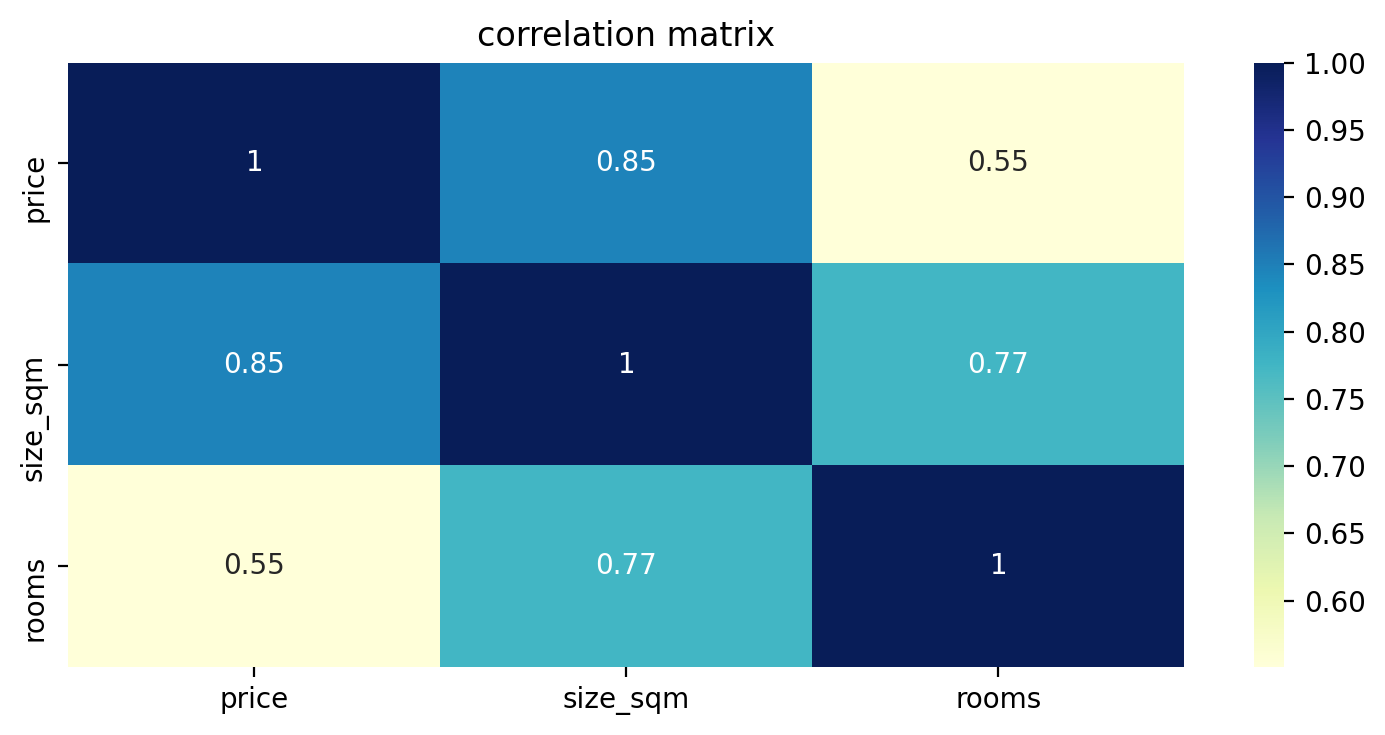

In [454]:
plt.figure(figsize=(9,4), dpi=200)
sns.heatmap(correlations, cmap="YlGnBu", annot=True)
plt.title('correlation matrix')
plt.show()

In [455]:
cleaned_updated=cleaned_updated.copy()
cleaned_updated.drop('rooms',axis=1,inplace=True)
cleaned_updated.head()

,price,size_sqm,district
0,396000,29,Praga-Północ
1,695000,60,Bemowo
2,828000,55,Wilanów
3,730000,55,Białołęka
4,750000,39,Śródmieście


### There is a multicollinearity problem between rooms and size_sqm. The correlation coefficient is high with a value of 0.77. Building the model with these two predictors would disturb the regression coefficients. It is better to choose one of these variables to have well performing model. Size_sqm is a better predictor than rooms because it explains the dependent variable better (the correlation coefficient is 0.85 instead of 0.55).

In [456]:
dummies=pd.get_dummies(cleaned_updated['district'], prefix='district', drop_first=True)
dummies

,district_Białołęka,district_Bielany,district_Mokotów,district_Ochota,district_Praga-Południe,district_Praga-Północ,district_Rembertów,district_Targówek,district_Ursus,district_Ursynów,district_Wawer,district_Wesoła,district_Wilanów,district_Wola,district_Włochy,district_Śródmieście,district_Żoliborz
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11136,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11137,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [457]:
merged= pd.concat([cleaned_updated, dummies], axis='columns')
merged=merged.copy()
merged.drop('district',axis=1, inplace=True)
merged

,price,size_sqm,district_Białołęka,district_Bielany,district_Mokotów,district_Ochota,district_Praga-Południe,district_Praga-Północ,district_Rembertów,district_Targówek,district_Ursus,district_Ursynów,district_Wawer,district_Wesoła,district_Wilanów,district_Wola,district_Włochy,district_Śródmieście,district_Żoliborz
0,396000,29,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,695000,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,828000,55,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,730000,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,750000,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,2855600,110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11135,9196000,367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11136,1016400,73,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
11137,968000,73,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [458]:
X=merged.drop('price', axis=1)
y=merged['price']

In [459]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [461]:
X_train.head()

,size_sqm,district_Białołęka,district_Bielany,district_Mokotów,district_Ochota,district_Praga-Południe,district_Praga-Północ,district_Rembertów,district_Targówek,district_Ursus,district_Ursynów,district_Wawer,district_Wesoła,district_Wilanów,district_Wola,district_Włochy,district_Śródmieście,district_Żoliborz
1535,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5409,107,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7663,67,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4264,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2463,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [462]:
y_train.head()

1535    1180000
5409     899000
7663     599000
4264     940000
2463     822000
Name: price, dtype: int64

In [463]:
linear=linear_model.LinearRegression()

In [464]:
linear.fit(X_train,y_train)

LinearRegression()

In [465]:
print(linear.coef_)
print(linear.intercept_)

[  21466.10320269  -50980.71783555  100040.71295953  283738.66460867
  164036.99389733  102958.65900975  192622.19428093 -107777.99609702
   19741.53636428   26496.96065067   24882.43520638 -218319.50717714
 -192815.78204354  147453.49333736  274806.17865802   94483.78690224
  608145.9851741   284907.89266721]
-578773.7214696046


# R²

In [466]:
r_squared=linear.score(X=X_test, y=y_test)
print(round(r_squared , 2))

0.77


In [467]:
y_pred_test=linear.predict(X_test)
pd.Series(y_pred_test).apply("{0:.5f}".format).head()

0      82303.62081
1    2841431.78326
2     606541.27765
3     787008.37207
4     704939.30772
dtype: object

# MAE

In [468]:
from sklearn.metrics import mean_absolute_error

linear_mae_test=mean_absolute_error(y_test, y_pred_test)

print('Linear regression MAE (test set):',round(linear_mae_test))

Linear regression MAE (test set): 235292


# MSE

In [469]:
from sklearn.metrics import mean_squared_error

linear_mse_test=mean_squared_error(y_test, y_pred_test)

print('Linear regression MSE (test set):',round(linear_mse_test))

Linear regression MSE (test set): 183318043622


# CONCLUSIONS

Otodom is one of the most popular property sales websites in Poland. My aim was to explore all the flat listings on the secondary market in Warsaw and build a linear regression model to predict flat prices. The work was based on properties that were available for purchase in September 2022. After pre-processing and cleaning the data, I made statistics for the whole city and grouped ones for each district. The total value of flats listed for sale in September reached 9087, so in my opinion the statistics are realistic due to the large number of listings. The median price of all flats is 13,407 PLN / m². The minimum price of a flat is 8,042 PLN / m², while the most expensive flat costs 44,353 PLN / m². The median area of a flat expressed in square metres is 54 m². The minimum size of a flat is 14 m² while the maximum is 488 m². Two- and three-room flats dominate the market. They represent a total of 76 % of all offers. There are 3568 (39%) two-room flats for sale and 3360 (37%) three-room ones. Majority of flats on the market is located in Mokotów. Below is frequency table for listings in each urban district (descending order): 
-   1. Mokotów (1393 offers, 15% overall)
-   2. Wola (986 offers, 11% overall)
-   3. Śródmieście (916 offers, 10 % overall)
-   

     ...
     
     
     
     
     
     
     
     

-   16. Wawer (109 offers, 1.1% overall)
-   17. Wesoła ( 65 offers, 0.7% overall)
-   18. Rembertów ( 49 offers, 0.5% overall)

The most expensive flats are located in the Śródmieście district, while the cheapest are in Wesoła. Below are the grouped price per m² medians for each district expressed in PLN / m² (all prices are calculated according to the median).
-   1. Śródmieście 18 915 PLN / m2
-   2. Wilanów 15 818 PLN / m2
-   3. Żoliborz 15 777 PLN / m2
-   4. Wola 14974 PLN / m2
-   5. Mokotów 14699 PLN / m2

     ...
     
     
     
     
     
     
     
     

-   16. Białołęka 10 348 PLN / m2
-   17. Rembertów 10 184 PLN / m2
-   18. Wesoła 9 992 PLN / m2

The largest apartments for sale are located in Wilanów and the smallest in Praga-Północ. Below are the grouped area medians expressed in m² for each district:

-   1. Wilanów 68 m²
-   2. Wesoła 67 m²
-   3. Wawer 64 m²

     ...
     
     
     
     
     
     
     
     

-   16. Żoliborz 50 m²
-   17. Wola  49 m²
-   18. Praga-Północ  44.5 m²

A linear regression model was built for forecasting purposes. The dependent variable is price. The model contains only two predictors (property size and neighbourhood) due to the multicollinearity problem and the small number of variables in the dataset. The machine learning model was built on the training dataset, which represents 80% of the total data. The R² of the model is 0.77 and it means that 77% of the variability observed in the target variable is explained by the regression model. The values of the error metrics: MAE and MSE are quite large. Mean absolute error of the model is 235292 and mean squared error is 183318043622. It is clear that the price of a property does not only depend on the area and district. There are more very important factors that need to be used to get more accurate predictions, such as the year of construction, the standard of the property and many more.